In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/just-ai-249-machine-learning-lab-competition/sample_submission.csv
/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv
/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv


# OMAR MOHAMMED ABUALRUB 160208

# Load the Data

In [2]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv')
test_df = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv')

# Display the first few rows
print("Training Data:")
print(train_df.head())

print("\nTest Data:")
print(test_df.head())


Training Data:
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00                0.0           1.12           0.0   
1            0.32                0.0           0.64           0.0   
2            0.00                0.0           0.00           0.0   
3            0.19                0.0           0.00           0.0   
4            0.00                0.0           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.56            0.00               0.0                0.00   
1           0.32            0.32               0.0                1.61   
2           0.34            0.00               0.0                0.34   
3           0.00            0.00               0.0                0.00   
4           0.00            0.00               0.0                0.00   

   word_freq_order  word_freq_mail  ...  char_freq_(  char_freq_[  \
0             0.00            0.56  ...        0.101    

# Exploratory Data Analysis (EDA)

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     3220.000000        3220.000000    3220.000000   3220.000000   
mean         0.107565           0.219578       0.275407      0.058829   
std          0.314254           1.327783       0.503584      1.259640   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.410000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    3220.000000     3220.000000       3220.000000         3220.000000   
mean        0.314683        0.097298          0.118898            0.099686   
std         0.651033        0.284463          0.409209            0.346193   
min         0.000000        0.

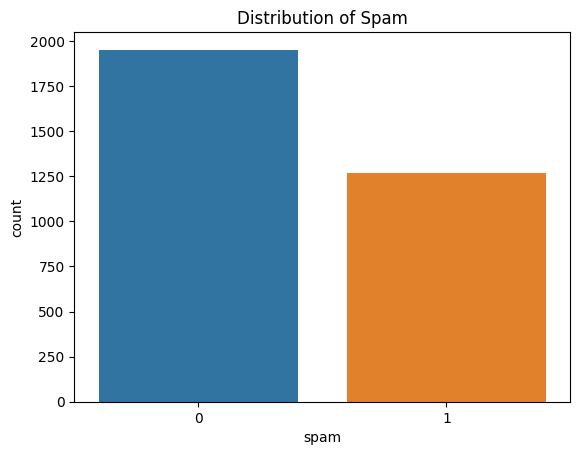

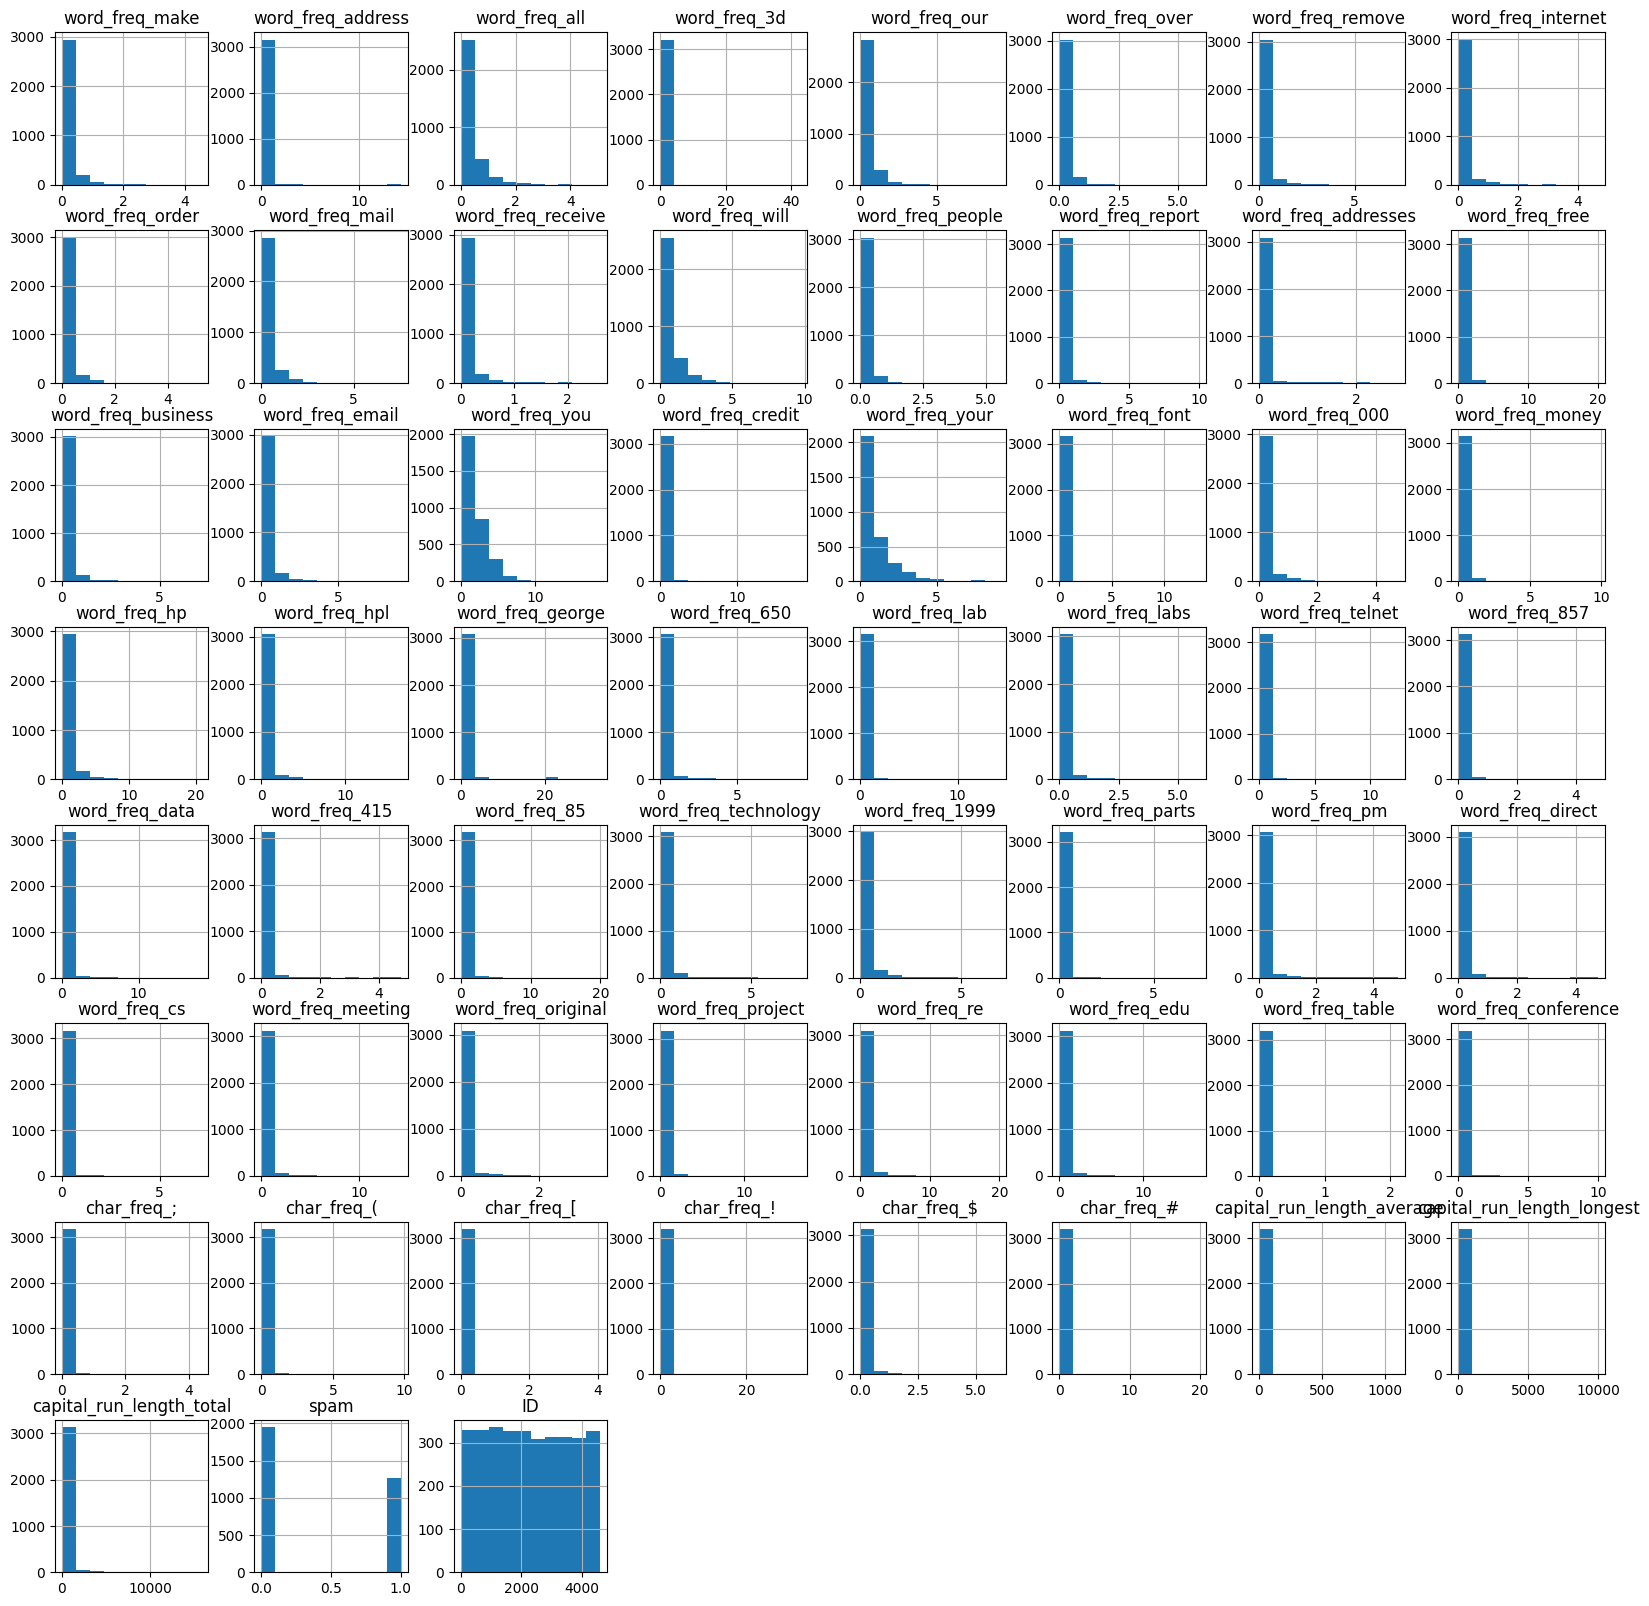

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics
print(train_df.describe())

# Check for missing values
print(train_df.isnull().sum())

# Plot distribution of target variable
sns.countplot(x='spam', data=train_df)
plt.title('Distribution of Spam')
plt.show()

# Plot feature distributions
train_df.hist(figsize=(20, 20))
plt.show()

# Plot correlations
plt.figure(figsize=(12, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Data Preparation

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target, drop 'ID' column if it exists
X = train_df.drop(columns=['spam', 'ID'], errors='ignore')
y = train_df['spam']
X_test = test_df.drop(columns=['ID'], errors='ignore')

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Model Training and Evaluation

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'Validation Accuracy: {accuracy:.2f}')
print(f'Validation F1 Score: {f1:.2f}')


Validation Accuracy: 0.96
Validation F1 Score: 0.95


# Make Predictions and Create Submission

In [7]:
# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'ID': test_df['ID'],  # assuming the test data has an 'ID' column
    'spam': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")


Submission file created successfully!
